# Bike Theft Data Notebook

Authors: Shital, Jason, Nick, and Liam

## Setup Notebook

In [1]:
# Import 3rd party libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import plotly.express as px

# Configure Notebook:
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
# Import the bike theft dataset as a dataframe:
bike_data = pd.read_csv('Data\Bicycle_Thefts_Open_Data.csv')

In [3]:
bike_data.head()

OBJECTID EVENT_UNIQUE_ID   PRIMARY_OFFENCE               OCC_DATE  \
0         1  GO-20141263784  PROPERTY - FOUND    1/1/2014 5:00:00 AM   
1         2  GO-20141263544               B&E  12/26/2013 5:00:00 AM   
2         3  GO-20141261431       THEFT UNDER    1/1/2014 5:00:00 AM   
3         4  GO-20141267465       THEFT UNDER   9/30/2013 5:00:00 AM   
4         5  GO-20149000074       THEFT UNDER  12/25/2013 5:00:00 AM   

   OCC_YEAR  OCC_MONTH    OCC_DOW  OCC_DAY  OCC_DOY  OCC_HOUR  ... BIKE_COST  \
0      2014    January  Wednesday        1        1        18  ...       NaN   
1      2013   December   Thursday       26      360        19  ...    1300.0   
2      2014    January  Wednesday        1        1         7  ...       NaN   
3      2013  September     Monday       30      273         0  ...     750.0   
4      2013   December  Wednesday       25      359        16  ...    1500.0   

      STATUS HOOD_158             NEIGHBOURHOOD_158  HOOD_140  \
0  RECOVERED      080  Palmerston-Little Italy (80)       080   
1     STOLEN      165  Harbourfront-CityPlace (165)       077   
2     STOLEN      085           South Parkdale (85)       085   
3     STOLEN      078     Kensington-Chinatown (78)       078   
4     STOLEN      168     Downtown Yonge East (168)       075   

                        NEIGHBOURHOOD_140  LONG_WGS84  LAT_WGS84  \
0            Palmerston-Little Italy (80)  -79.414654  43.660525   
1  Waterfront Communities-The Island (77)  -79.395643  43.640021   
2                     South Parkdale (85)  -79.443645  43.637657   
3               Kensington-Chinatown (78)  -79.404678  43.648964   
4              Church-Yonge Corridor (75)  -79.372690  43.652377   

              x             y  
0 -8.840399e+06  5.413057e+06  
1 -8.838283e+06  5.409903e+06  
2 -8.843626e+06  5.409539e+06  
3 -8.839288e+06  5.411278e+06  
4 -8.835727e+06  5.411803e+06  

[5 rows x 35 columns]

We can check the number of missing data values present in each column to start.

In [4]:
# Count number of missing values from each column:
bike_data.isna().sum()

OBJECTID                 0
EVENT_UNIQUE_ID          0
PRIMARY_OFFENCE          0
OCC_DATE                 0
OCC_YEAR                 0
OCC_MONTH                0
OCC_DOW                  0
OCC_DAY                  0
OCC_DOY                  0
OCC_HOUR                 0
REPORT_DATE              0
REPORT_YEAR              0
REPORT_MONTH             0
REPORT_DOW               0
REPORT_DAY               0
REPORT_DOY               0
REPORT_HOUR              0
DIVISION                 0
LOCATION_TYPE            0
PREMISES_TYPE            0
BIKE_MAKE              183
BIKE_MODEL           13707
BIKE_TYPE                0
BIKE_SPEED            1135
BIKE_COLOUR           3292
BIKE_COST             2490
STATUS                   0
HOOD_158                 0
NEIGHBOURHOOD_158        0
HOOD_140                 0
NEIGHBOURHOOD_140        0
LONG_WGS84               0
LAT_WGS84                0
x                        0
y                        0
dtype: int64

Number of unique types of primary offence:

In [5]:
bike_data['PRIMARY_OFFENCE'].unique()

array(['PROPERTY - FOUND', 'B&E', 'THEFT UNDER',
       'THEFT FROM MOTOR VEHICLE UNDER', 'PROPERTY - LOST',
       "B&E W'INTENT", 'THEFT UNDER - BICYCLE', 'MISCHIEF UNDER',
       'POSSESSION PROPERTY OBC UNDER', 'THEFT OVER',
       'INCIDENT - BICYCLE', 'FRAUD UNDER', 'THEFT UNDER - SHOPLIFTING',
       'FTC PROBATION ORDER', 'INCIDENT', 'PROPERTY - RECOVERED',
       'ROBBERY - MUGGING', 'CARELESS DRIVING- HTA',
       'ROBBERY WITH WEAPON', 'ROBBERY - OTHER', 'THEFT OF MOTOR VEHICLE',
       'THEFT FROM MOTOR VEHICLE OVER', 'POSSESSION PROPERTY OBC OVER',
       'SUSPICIOUS INCIDENT', 'UNLAWFULLY IN DWELLING-HOUSE',
       'FRAUD OVER', 'INTIMATE PARTNER INCIDENT',
       'MISCHIEF - ENDANGER LIFE', 'MISCHIEF - INTERFERE W-PROP',
       'ROBBERY - SWARMING', 'AGGRAVATED ASLT PEACE OFFICER', 'ASSAULT',
       'ASSAULT WITH WEAPON', 'ROBBERY - HOME INVASION',
       'ARR/WARR EXECUTED NO ADDED CHG', 'TRAFFICKING PROPERTY OBC UNDER',
       'THEFT OVER - BICYCLE', 'THEFT OF EBIKE UN

*Given the above check, some offences are not identified as theft but stil have the Bike Cost included. This may be due to a more serious offence in the event of the theft occuring. Also, we can observe that there are duplicate events. However, the objects stolen are different.*

In [6]:
# Create new columns for year, month, day of week for continuous values. Ensure that these values are obtained from the reported date.
bike_data['REPORT_DATE'] = pd.to_datetime(bike_data['REPORT_DATE'])

bike_data['year'] = bike_data['REPORT_DATE'].dt.year
bike_data['month'] = bike_data['REPORT_DATE'].dt.month
bike_data['day_of_the_week'] = bike_data['REPORT_DATE'].dt.day_of_week

bike_data.head()

OBJECTID EVENT_UNIQUE_ID   PRIMARY_OFFENCE               OCC_DATE  \
0         1  GO-20141263784  PROPERTY - FOUND    1/1/2014 5:00:00 AM   
1         2  GO-20141263544               B&E  12/26/2013 5:00:00 AM   
2         3  GO-20141261431       THEFT UNDER    1/1/2014 5:00:00 AM   
3         4  GO-20141267465       THEFT UNDER   9/30/2013 5:00:00 AM   
4         5  GO-20149000074       THEFT UNDER  12/25/2013 5:00:00 AM   

   OCC_YEAR  OCC_MONTH    OCC_DOW  OCC_DAY  OCC_DOY  OCC_HOUR  ...  \
0      2014    January  Wednesday        1        1        18  ...   
1      2013   December   Thursday       26      360        19  ...   
2      2014    January  Wednesday        1        1         7  ...   
3      2013  September     Monday       30      273         0  ...   
4      2013   December  Wednesday       25      359        16  ...   

              NEIGHBOURHOOD_158  HOOD_140  \
0  Palmerston-Little Italy (80)       080   
1  Harbourfront-CityPlace (165)       077   
2           South Parkdale (85)       085   
3     Kensington-Chinatown (78)       078   
4     Downtown Yonge East (168)       075   

                        NEIGHBOURHOOD_140 LONG_WGS84  LAT_WGS84             x  \
0            Palmerston-Little Italy (80) -79.414654  43.660525 -8.840399e+06   
1  Waterfront Communities-The Island (77) -79.395643  43.640021 -8.838283e+06   
2                     South Parkdale (85) -79.443645  43.637657 -8.843626e+06   
3               Kensington-Chinatown (78) -79.404678  43.648964 -8.839288e+06   
4              Church-Yonge Corridor (75) -79.372690  43.652377 -8.835727e+06   

              y  year month day_of_the_week  
0  5.413057e+06  2014     1               2  
1  5.409903e+06  2014     1               2  
2  5.409539e+06  2014     1               2  
3  5.411278e+06  2014     1               3  
4  5.411803e+06  2014     1               3  

[5 rows x 38 columns]

## Exploratory Data Analysis (EDA)

*Visualizing Relationships Within the Bike Theft Dataset*

### Bike Thefts in Neighbourhoods

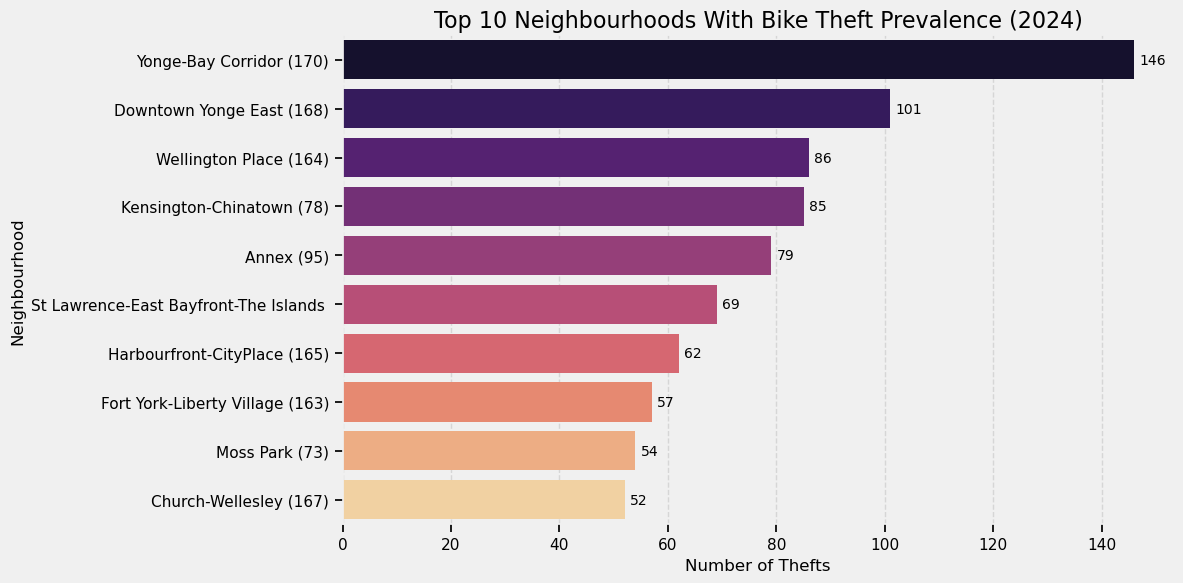

In [7]:
# Let's explore the neighbourhoods which are most prone to bike theft in the year 2024.

bike_thefts_2024 = bike_data[bike_data['year'] == 2024]

# groupby the NEIGHBOURHOOD_158 column which contains all 158 neighbourhoods within Toronto.

neighbourhood_counts = (
    bike_thefts_2024.groupby('NEIGHBOURHOOD_158').size().reset_index(name = 'Theft_Count')
)

# to plot the top 10 neighbourhoods, lets sort the counts.

top_neighbourhoods = neighbourhood_counts.sort_values(by = 'Theft_Count', ascending = False).head(10)

# plot the top 10 neighbourhoods in a barplot and use a colour gradient to visualize intensities.

plt.figure(figsize = (12, 6))
sns.barplot(data = top_neighbourhoods, x = 'Theft_Count', y = 'NEIGHBOURHOOD_158', palette = 'magma')

plt.title('Top 10 Neighbourhoods With Bike Theft Prevalence (2024)', fontsize = 16)
plt.xlabel('Number of Thefts', fontsize = 12)
plt.ylabel('Neighbourhood', fontsize = 12)
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)

# insert numerical values beside bars.
for i, value in enumerate(top_neighbourhoods['Theft_Count']):
    plt.text(value + 1, i, str(value), va = 'center', fontsize = 10)

plt.tight_layout()
plt.show()

### Recovery Rate

*The TPS provides a bike identification system which allows the registered bike owner to retrieve their stolen bike on the chance it may be found by police or general public. Let's see the ratio between the bikes marked as stolen and those that have been recovered.*

Text(0.5, 1.0, 'Bike Theft Status (%)')

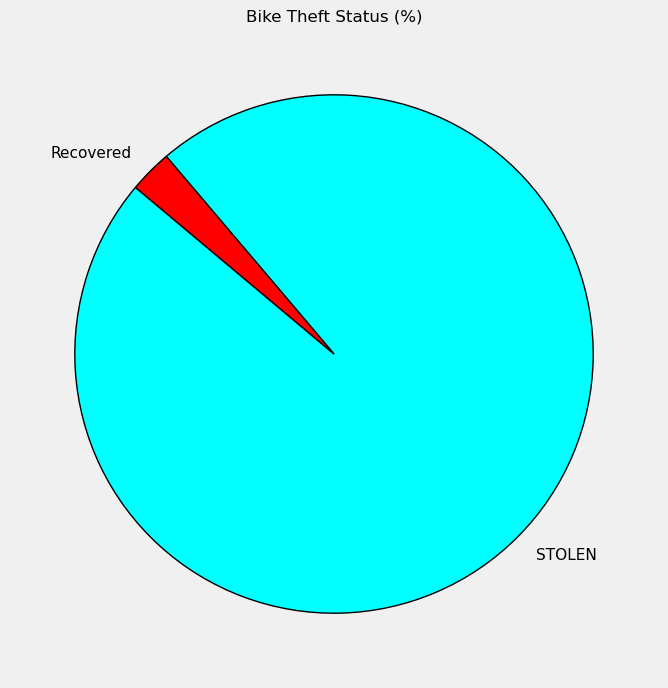

In [8]:
status_count = bike_data['STATUS'].value_counts()

# There are three unique statuses 'Unknown' , 'Recovered' , and 'Stolen' - combine unknown and recovered and consider its combination recovered.
status_count['Recovered'] = status_count.loc[['UNKNOWN','RECOVERED']].sum()
status_count = status_count.drop(['UNKNOWN','RECOVERED']) #remove unknown from the count

# Create a pie chart to visualize the ratio between stolen and recovered.

plt.figure(figsize = (8,8))

plt.pie(status_count, labels =status_count.index, colors = ['cyan', 'red'], startangle = 140, wedgeprops={'edgecolor': 'black'})
plt.title('Bike Theft Status (%)')

### Bike Theft and Time of Year

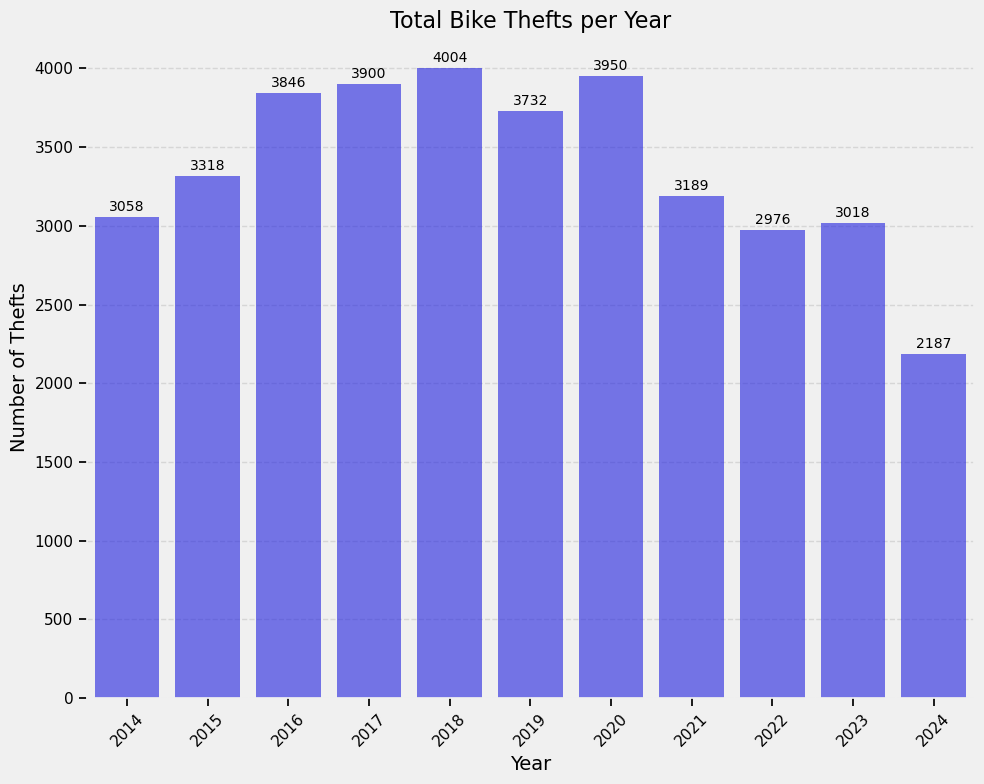

In [9]:
# Plot the total theft by available years.

# Groupby year:
bike_theft_yearly = bike_data.groupby('year').size().reset_index(name = 'Theft_Count')

# Plot:

plt.figure(figsize=(10,8))

# Create a bar plot:
sns.barplot(x = 'year', y = 'Theft_Count', data = bike_theft_yearly, color = 'blue', alpha = 0.6)

# Insert numerical values beside above bars:
for i, bar in enumerate(plt.gca().containers[0]):
    height = bar.get_height() #get the height of bar to position the annotation properly
    plt.text(
        bar.get_x() + bar.get_width()/2, height + 20, #position the horizontal and vertical
        f'{int(height)}', #this takes the bar height value which is equivalent to the theft count
        ha = 'center', va = 'bottom', fontsize = 10, color = 'black'
    )

plt.title('Total Bike Thefts per Year', fontsize = 16)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of Thefts', fontsize = 14)
plt.xticks(rotation = 45)
plt.grid(axis='y', linestyle='--', alpha = 0.7)

# Show the plot:
plt.tight_layout()
plt.show()

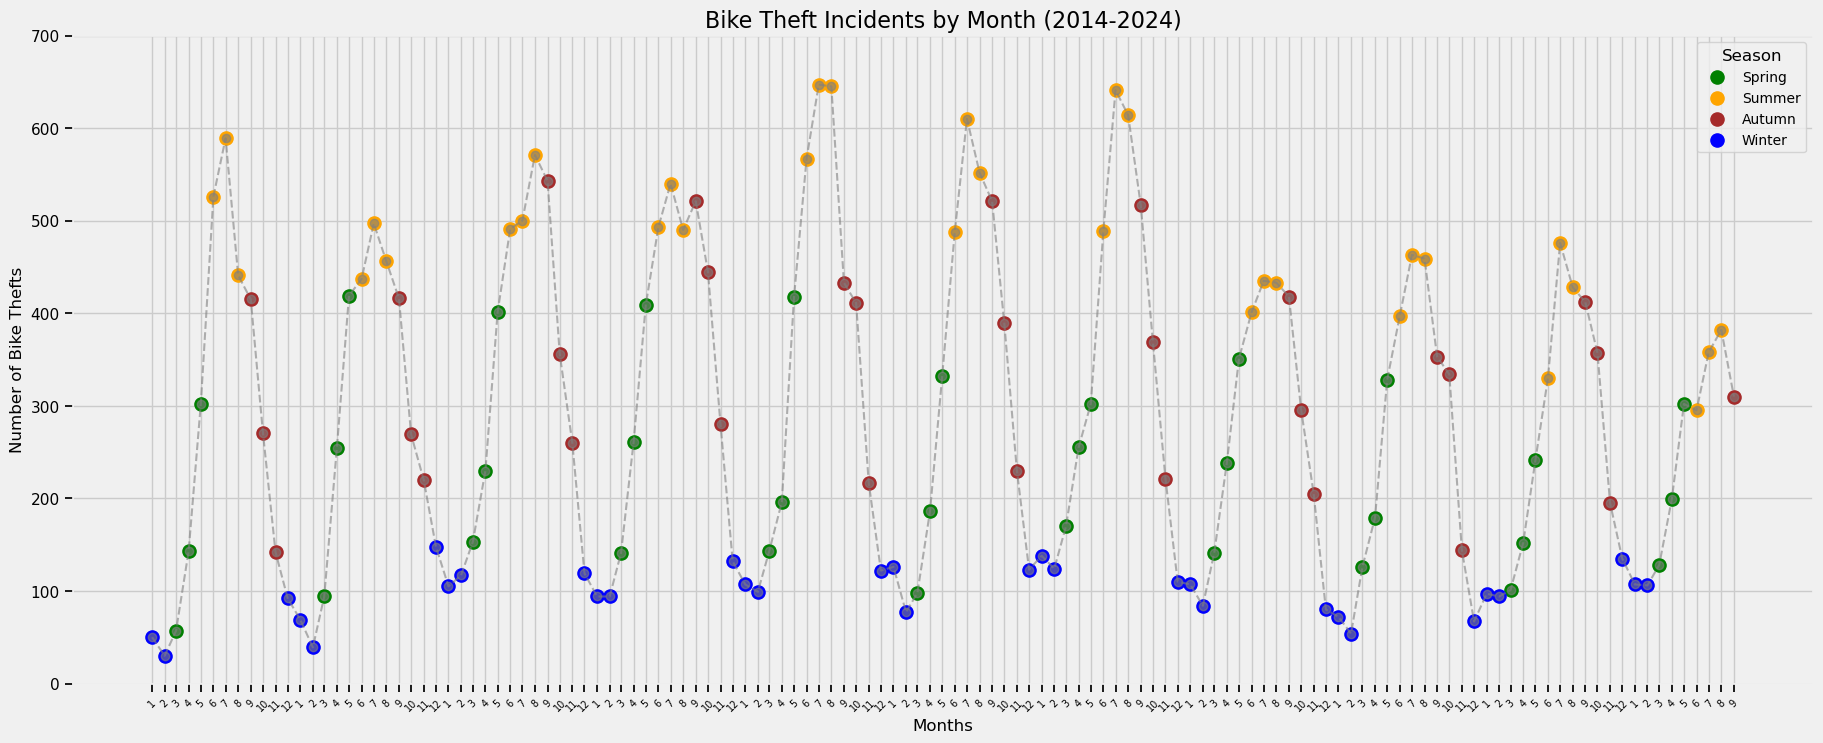

In [10]:
# let's make a plot similar to previous plot but with lineplot. Make the x-axis interval in months to show seasonal/monthly trends.
bike_data_grouped = bike_data.groupby(['year','month']).size().reset_index(name = 'Theft_Count')

# Create a new column named 'date' to plot the first day of the month for the particular year.
bike_data_grouped['date'] = pd.to_datetime(bike_data_grouped[['year','month']].assign(day=1))

# To make our plot more visible let's colour code the different seasons of a year.
def season_colour(month):
    if month in [3, 4, 5]:      #Mar - May = spring/green
        return 'green'
    elif month in [6, 7, 8]:    #June-Aug = Summer/orange
        return 'orange'
    elif month in [9, 10, 11]:  #Sept - Nov = Autumn/brown
        return 'brown'
    else:                       #Dec - Feb = Winter/blue
        return 'blue'

# Create new column 'Season_Colour' and apply the season_colour function to the month.
bike_data_grouped['Season_Colour'] = bike_data_grouped['month'].apply(season_colour)


plt.figure(figsize=(20, 8))
plt.plot(bike_data_grouped['date'], bike_data_grouped['Theft_Count'], marker='o', color='grey', alpha=0.6, linestyle='--')

# Create scatter plot on the lineplot using the correct colour.
for season, colour in zip(['Spring', 'Summer', 'Autumn', 'Winter'], ['green', 'orange', 'brown', 'blue']):
    subset = bike_data_grouped[bike_data_grouped['Season_Colour'] == colour]
    plt.scatter(subset['date'], subset['Theft_Count'],color=colour,label=season, s=90)

plt.title('Bike Theft Incidents by Month (2014-2024)', fontsize=16)
plt.xlabel('Months', fontsize=12)
plt.ylabel('Number of Bike Thefts', fontsize=12)

plt.xticks(bike_data_grouped['date'], bike_data_grouped['month'], rotation = 45, fontsize = 7)

plt.legend(title='Season', fontsize=10)
plt.grid(True)
plt.ylim(0, 700)
plt.show()

The above has a cluttered horizontal axis. Let us fix that by using an interactive line plot capability offered by the `plotly` package. Prior to doing this, it is also helpful to add a `Season` column to the dataframe as well. Other convenient columns are also added.

In [11]:
# Map colour to season using a dictionary:
season_colours = {
    'blue': 'Winter',
    'green': 'Spring',
    'orange': 'Summer',
    'brown': 'Autumn'
}

# Month names:
month_names = {
    1: 'January', 2: 'February', 3: 'March', 
    4: 'April', 5: 'May', 6: 'June', 
    7: 'July', 8: 'August', 9: 'September', 
    10: 'October', 11: 'November', 12: 'December', 
}

# Apply the above mappings to the dataframe:
bike_data_grouped['Season'] = bike_data_grouped['Season_Colour'].apply(lambda row: season_colours[row])
bike_data_grouped['Month_Name'] = bike_data_grouped['month'].apply(lambda row: month_names[row])

Let's create the plot:

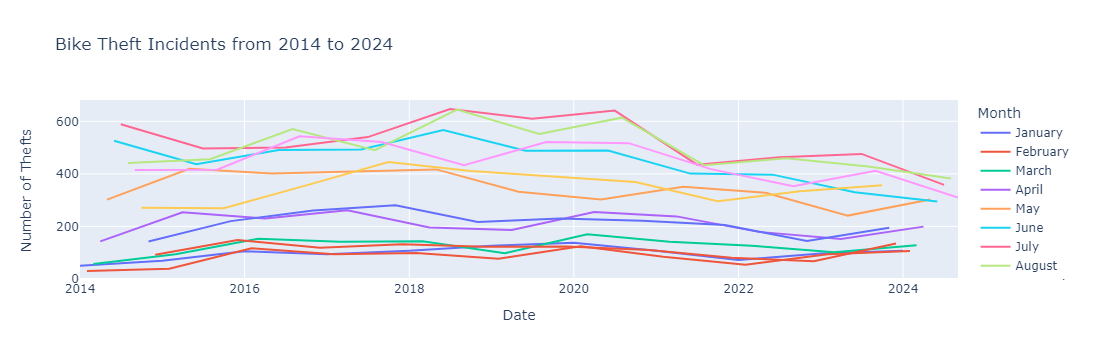

In [12]:
# Plotly line plot:
fig = px.line(bike_data_grouped, x = 'date', y = 'Theft_Count', title = 'Bike Theft Incidents from 2014 to 2024', 
             line_group = 'Month_Name', color = 'Month_Name', hover_name = 'Season', 
              labels = {
                 'date': 'Date',
                 'Theft_Count': 'Number of Thefts', 
                  'Month_Name': 'Month'
             })

fig.show()

It is also possible to make an animated plot as well:

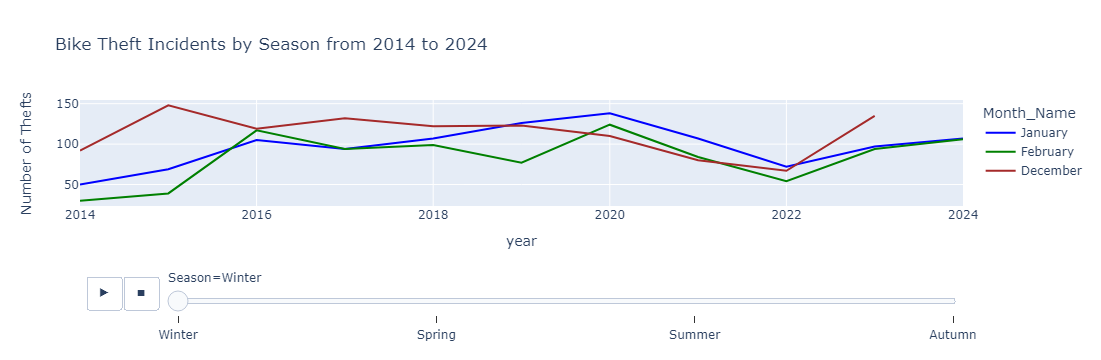

In [13]:
# Plotly line plot for grouped data:
# Colours used for plots are common CSS colours.
fig = px.line(bike_data_grouped, x = 'year', y = 'Theft_Count', title = 'Bike Theft Incidents by Season from 2014 to 2024', 
             animation_frame = 'Season', color = 'Month_Name', color_discrete_sequence = ['blue', 'green', 'orange', 'brown'], hover_name = 'year', 
              labels = {
                 'date': 'Date',
                 'Theft_Count': 'Number of Thefts',
                  'Season': 'Season'
             })

fig.show()

As shown in the previous line plots, bike thefts occur the least during the winter months while summer months observe the most instances. One main explanation for this observation is that more people ride bikes outside when the weather is nice, as is evident with summer months offering warmer and sunnier conditions compared to the cold winters. With more bikes outside on the street, this increased presence attracts thieves and results in a noticeable increase in bike thefts.

We may also look at an animation of the number of thefts and see how it changes from 2014 up to 2024. The following interactive plot shows this change. This plot incorporates the "slider" feature, similar to a Microsoft Excel PivotChart. For visualization, the cyclical colour palette named `IceFire` was chosen as the colours roughly match the season they evoke (i.e., black and dark blues for December, January, February and transitions from cold to hot as spring draws near).

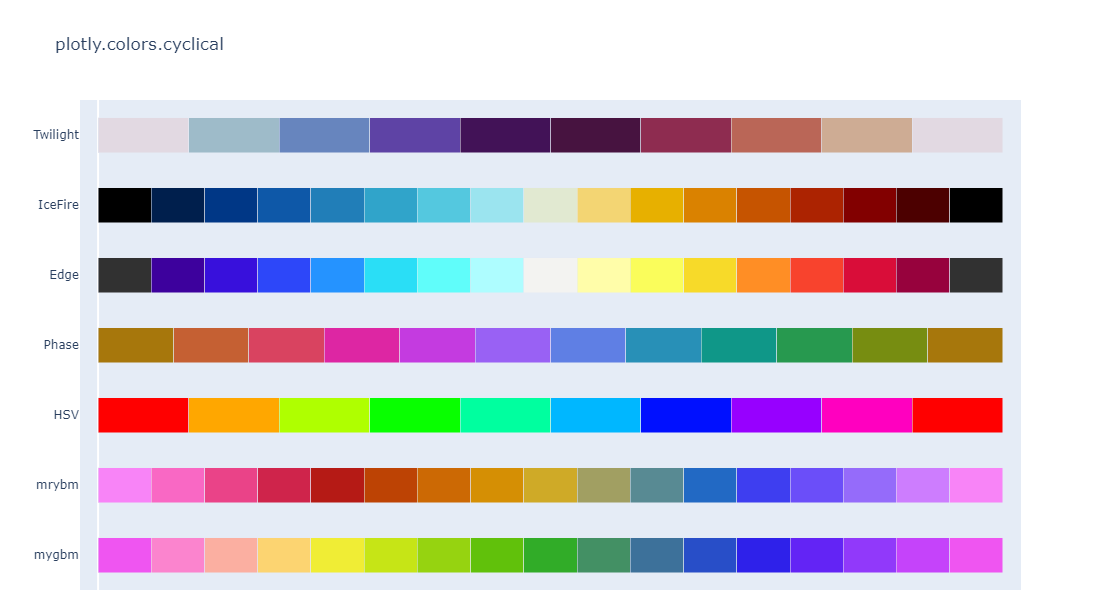

In [14]:
px.colors.cyclical.swatches()

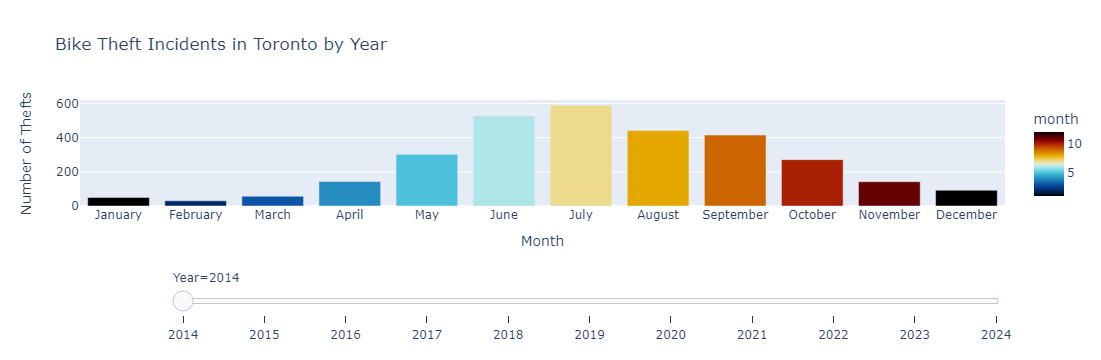

In [15]:
# Plot with sliders for year:
fig = px.bar(bike_data_grouped, x = 'Month_Name', y = 'Theft_Count', title = 'Bike Theft Incidents in Toronto by Year', 
             animation_frame = 'year', hover_name = 'Season',  
             color = 'month', color_continuous_scale = px.colors.cyclical.IceFire, 
              labels = {
                 'Month_Name': 'Month',
                 'Theft_Count': 'Number of Thefts', 
                  'year': 'Year'
             })

# Hide animation buttons and show the plot:
fig['layout'].pop('updatemenus')
fig.show()

There was a decrease from 2020 to 2021 due to more restrictions placed on the population at the peak of the global coronavirus (COVID-19) pandemic.

### Bike Thefts and Location Type

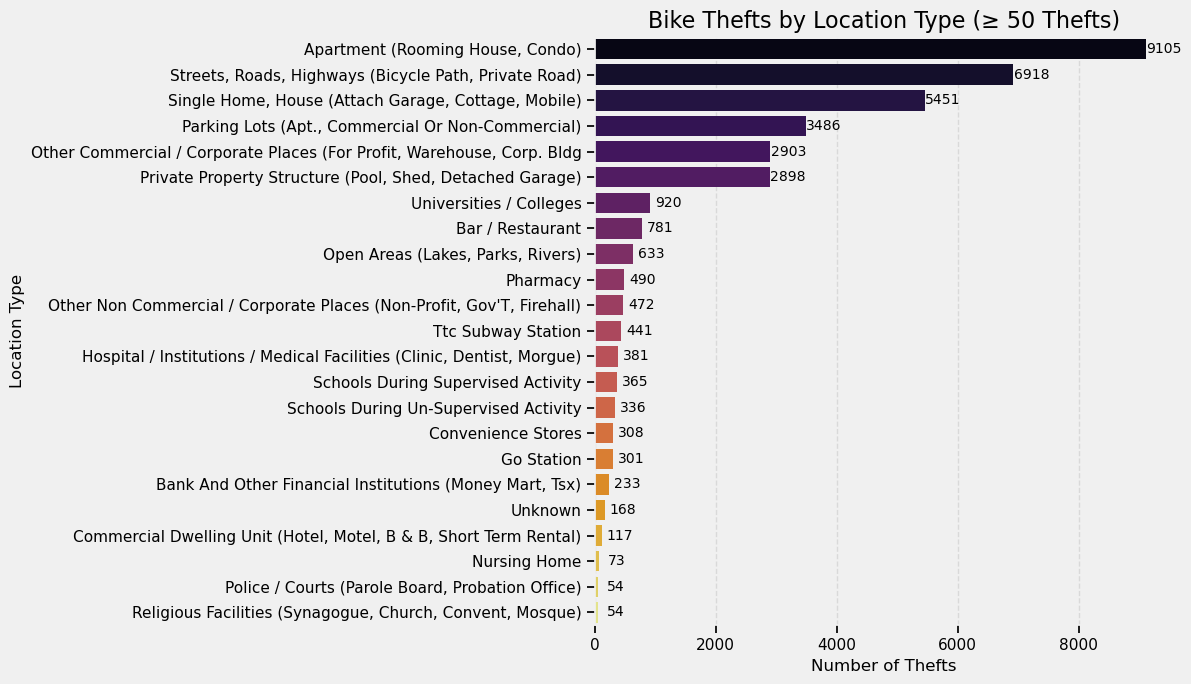

In [16]:
# Plot the relationship between theft and location type
location_type_theft = bike_data['LOCATION_TYPE'].value_counts().reset_index()
location_type_theft.columns = ['location_type','theft_count'] #include only two columns in df

# As to condense our plot, lets only focus on location types with 50 or more thefts
location_type_theft_filt = location_type_theft[location_type_theft['theft_count']>=50]

plt.figure(figsize = (12,7))
sns.barplot(data = location_type_theft_filt, x ='theft_count', y='location_type', palette = 'inferno')

# Add the theft values beside each bar
for x, bar in enumerate(plt.gca().containers[0]):
    width = bar.get_width()
    plt.text(
        width + 300, bar.get_y()+bar.get_height()/2, #position outside bar so its legible
        f'{int(width)}',
        ha='center', va='center', fontsize =10, color='black'
    )

plt.title('Bike Thefts by Location Type (≥ 50 Thefts)', fontsize=16)
plt.xlabel('Number of Thefts', fontsize=12)
plt.ylabel('Location Type', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Bike Theft Costs

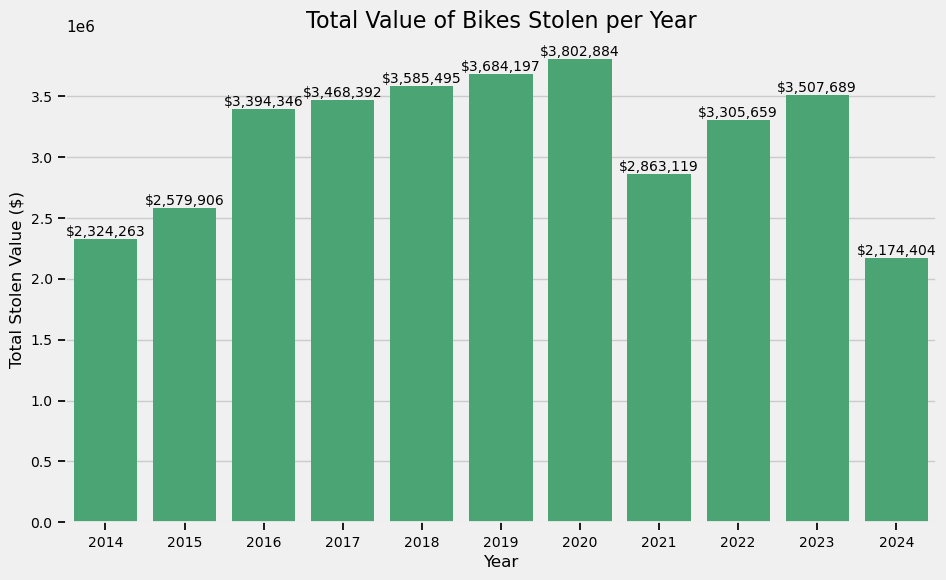

In [17]:
# let's plot the relationship between year and the total cost of stolen bikes as well:

cost_per_year = bike_data.groupby('year')['BIKE_COST'].sum().reset_index()

plt.figure(figsize = (10,6))
sns.barplot(data = cost_per_year, x = 'year', y = 'BIKE_COST', color = 'MediumSeaGreen')
#annotate bar with value in unit of $
for i, value in enumerate(cost_per_year['BIKE_COST']):
    plt.text(i, value +500,
             f'${value:,.0f}',
             ha='center', va='bottom', fontsize =10)
    
plt.title('Total Value of Bikes Stolen per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Stolen Value ($)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The drop from 2020 to 2021 in the stolen value may be somewhat explained by the COVID-19 pandemic as economic activity significantly decreased due to restrictions and quarantines. The apparent drop in 2024 is an artefact of the available data, whereby records for October and November 2024 were not available at the time of download.

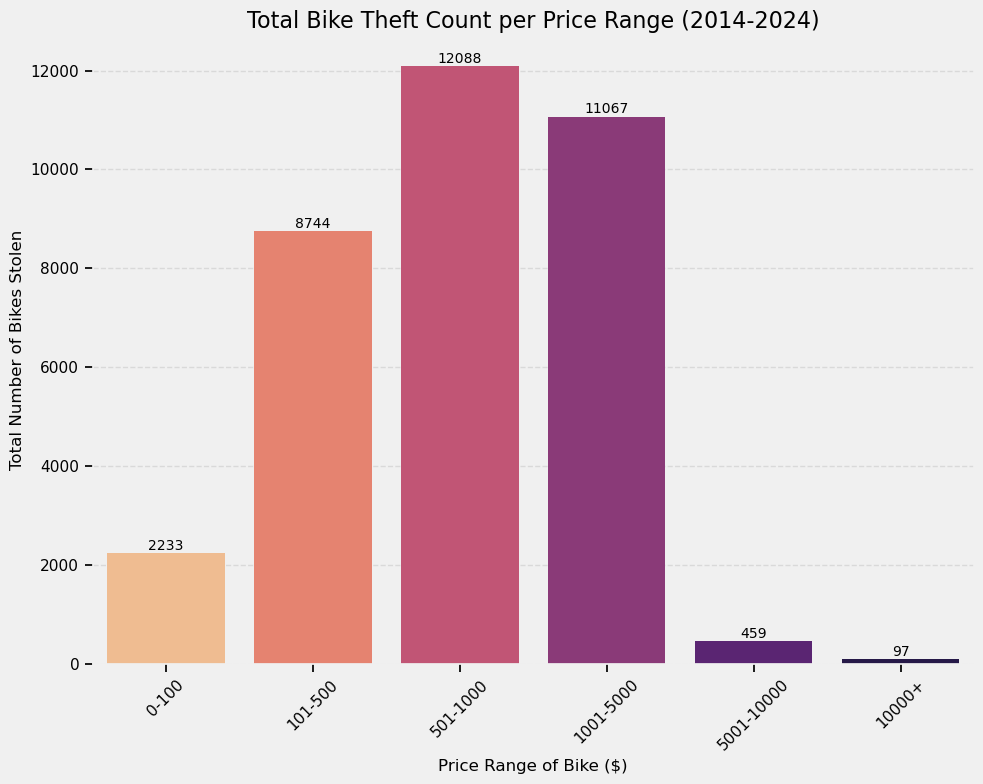

In [18]:
# Now lets plot theft vs price range of bike:
price_bins = [0,100,500,1000,5000,10000,10000000] #ranges for dollars
price_labels =['0-100','101-500','501-1000','1001-5000','5001-10000','10000+']

# Create new column and label the price range:
bike_data['price_range'] = pd.cut(bike_data['BIKE_COST'], bins = price_bins, labels =price_labels, right=False)

# Now use groupby for the range and find total thefts across all years:
price_range_theft = bike_data.groupby('price_range').size().reset_index(name='Theft_Count')

plt.figure(figsize=(10, 8))
sns.barplot(data = price_range_theft, x = 'price_range', y = 'Theft_Count', palette = 'magma_r')

# Annotate the theft count above bars:
for x, row in price_range_theft.iterrows():
    plt.text(x, row.Theft_Count+5, int(row.Theft_Count), ha = 'center', va = 'bottom', fontsize = 10)
    
plt.title('Total Bike Theft Count per Price Range (2014-2024)', fontsize = 16)
plt.xlabel('Price Range of Bike ($)', fontsize = 12)
plt.ylabel('Total Number of Bikes Stolen', fontsize = 12)
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)

plt.tight_layout()
plt.show()

As shown in the price range plot, thieves are likely to target bikes that were purchased between \\$501 and \\$1,000 dollars. For cheap bikes, such as those lesser than or equal to \\$100, thieves are less likely to steal those because of their lower re-sell value. For the very expensive bikes, not many individuals can afford these and thus there is a limited pool available for thieves to steal from. In addition, because the more expensive bikes are more valuable and of higher quality, they are often well-protected by their owners and this added layer of security makes a successful heist substantially more difficult. Based on these observations, riders with cheaper bikes attract less attention from thieves and experience relatively less theft compared to the other price brackets.